<a href="https://colab.research.google.com/github/GabrielaRomoM/SIGNALS-THEORY_2024-1/blob/main/RedNeuronal%5BPedal%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importar librerias
!pip install preprocessing
!pip install mathutils
!pip install plotting
!pip install scikit-learn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 15.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.6/349.6 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 14.9 MB/s eta 0:00:00
  Created wheel for nltk: filename=nltk-3.2.4-py3-none-any.whl size=1367704 sha256=b3fe61039d125856ed09db7323bed8c67cf3cd470f61f6d743590340cbc2d4b9
  Stored in directory: /root/.cache/pip/wheels/0e/8c/42/bcd0934b61ecf4cef964ccc9881888cca0841ec72266e99de1
Successfully built nltk
  Attempting uninstall: nltk
    Found existing installation: nltk 3.8.1
    Uninstalling nltk-3.8.1:
      Successfully uninstalled nltk-3.8.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.4/245.4 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mathutils: filename=mathutils-3.3.0-cp310-cp310-linux_x86_64.whl size=659355 sha256=147a974a198a269a5f8d5cbafda410796af4a00b1eb42db16b70004ab1863df0
  Store

In [ ]:
#SETUP
from preprocessing import *
from mathutils import *
from plotting import *
%matplotlib inline

#Generador de numeros aleatorios
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 12, 6
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

#BACKGROUND

#Función Sigmoide (Radio de cambio)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_prime(x):
    return sigmoid(x) * (1 - sigmoid(x))

x = np.linspace(-10., 10., num=100)

#Softmax (Representación de una distribución categórica)
def softmax(x):
    e_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return e_x / np.sum(e_x, axis=1, keepdims=True)

# Ejemplo de uso:
scores = np.array([[2, 4, 6, 8]])
probabilidades = softmax(scores) #Convierte los valores en distribución de probabilidades (Rango entre 0 y 1)
print(probabilidades)

#One Hot (representación de variables categóricas como vectores binarios)
def one_hot(y, n_classes):
    onehot = np.zeros((y.shape[0], n_classes))
    for i in range(len(y)):
        onehot[i, y[i]] = 1
    return onehot

[[0.00214401 0.0158422  0.11705891 0.86495488]]


In [ ]:
# Definición inicial del paso hacia adelante (Forward Pass)
epochs = 50000
input_size, hidden_size, output_size = 2, 3, 1
LR = .1 #Radio de Aprendizaje

#Datos iniciales/de entrenamiento
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([ [0], [1], [1], [0]])

# Pesos y definición de las conecciones entre capas y salida
w_hidden = np.random.uniform(size=(input_size, hidden_size))
w_output = np.random.uniform(size=(hidden_size, output_size))

#BACKPROP
#Implementacion del Algoritmo de retropropagación

for epoch in range(epochs):
  # Paso hacia adelante (Forward)
  act_hidden = sigmoid(np.dot(X, w_hidden))
  output = np.dot(act_hidden, w_output)
  # Calculo del error
  error = y - output
  if epoch % 5000 == 0:
    print (f'error sum {sum(error)}')
  # Retropropagación del error
  dZ = error * LR
  w_output += act_hidden.T.dot(dZ)
  dH = dZ.dot(w_output.T) * sigmoid_prime(act_hidden)
  w_hidden += X.T.dot(dH)

error sum [-1.77496016]
error sum [0.00586565]
error sum [0.00525699]
error sum [0.0003625]
error sum [-0.00064657]
error sum [0.00189532]
error sum [3.79101894e-08]
error sum [7.46057588e-13]
error sum [1.21404424e-14]
error sum [1.21404424e-14]


In [ ]:
#Intento de Predicción usando forward step
x_test = X[1]
act_hidden = sigmoid(np.dot(x_test, w_hidden))
np.dot(act_hidden, w_output)

array([1.])

# Building our own Neural NetworkClassifier

In [ ]:
import pandas as pd
import os
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

print(X_train_full.dtype, "-", X_train_full.shape)
print(y_train_full.dtype, "-", y_train_full.shape)

11490434/11490434 [==============================] - 0s 0us/step
uint8 - (60000, 28, 28)
uint8 - (60000,)


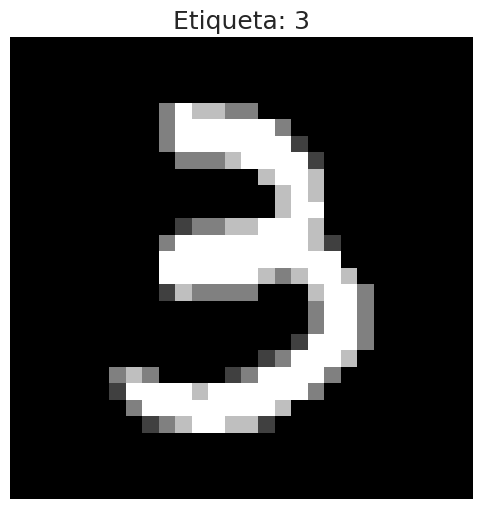

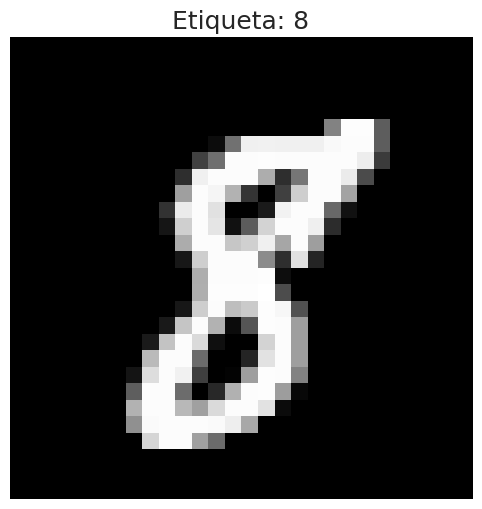

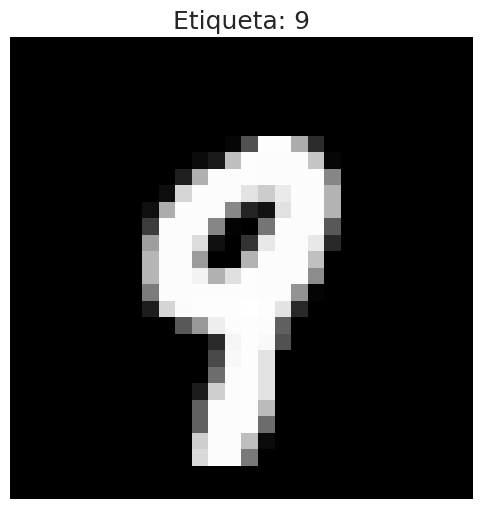

In [ ]:
#CLASIFICADOR DE REDES NEURONALES
#Leyendo y mezclando imágenes
images = X_train_full
labels = y_train_full
n_features = 28 * 28
n_classes = 10

def shuffle_data(X, y, random_seed=None): # Mezcla aleatoriamente los datos, manteniendo correspondencia entre imágenes y etiquetas.
    np.random.seed(random_seed)
    permutation = np.random.permutation(len(X))
    X_shuffled = X[permutation]
    y_shuffled = y[permutation]
    return X_shuffled, y_shuffled

#Reserva de 500 ejemplos para entrenamiento
X, y = shuffle_data(images, labels, random_seed=RANDOM_SEED)
X_train, y_train = X[:1000], y[:1000]
X_test, y_test = X[1000:], y[1000:]

#Exploración de datos

# Muestra una imagen del conjunto de datos MNIST y su etiqueta asociada.
def plot_digit(X, y, idx=0):
    imagen = X[idx]
    etiqueta = y[idx]  # Obtener la etiqueta correspondiente
    plt.imshow(imagen, cmap='gray')  # Mostrar la imagen en escala de grises
    plt.title('Etiqueta: {}'.format(etiqueta))  # Mostrar la etiqueta asociada a la imagen
    plt.axis('off')
    plt.show()

plot_digit(X, y, idx=1)
plot_digit(X, y, idx=2)
plot_digit(X, y, idx=3)

In [ ]:
#Implementación red neuronal multicapa
def l1_reg(l1, w1, w2):
    return l1 * (np.sum(np.abs(w1)) + np.sum(np.abs(w2)))

def l2_reg(l2, w1, w2):
    return l2 * (np.sum(w1 ** 2) + np.sum(w2 ** 2))

def cross_entropy(output, y_target):
    return - np.sum(np.log(output) * (y_target), axis=1)

class NNClassifier:
    def __init__(self, n_classes, n_features, n_hidden_units=30,
                 l1=0.0, l2=0.0, epochs=500, learning_rate=0.1,
                 n_batches=1, random_seed=None):
      if random_seed:
         np.random.seed(random_seed)
      self.n_classes = n_classes
      self.n_features = n_features
      self.n_hidden_units = n_hidden_units
      self.l1 = l1
      self.l2 = l2
      self.epochs = epochs
      self.learning_rate = learning_rate
      self.n_batches = n_batches
      self.w1, self.w2 = self._init_weights()

    def _init_weights(self):
              w1 = np.random.uniform(-1.0, 1.0,
                               size=self.n_hidden_units * (self.n_features + 1))
              w1 = w1.reshape(self.n_hidden_units, self.n_features + 1)
              w2 = np.random.uniform(-1.0, 1.0,
                               size=self.n_classes * (self.n_hidden_units + 1))
              w2 = w2.reshape(self.n_classes, self.n_hidden_units + 1)
              return w1, w2

    def _add_bias_unit(self, X, how='column'):
      if how == 'column':
        if len(X.shape) > 2:  # Check if X has more than 2 dimensions
            m = X.shape[0]
            X_flattened = X.reshape(m, -1)  # Flatten the 2D matrices
            X_new = np.ones((m, X_flattened.shape[1] + 1))
            X_new[:, :-1] = X_flattened
        else:
            X_new = np.ones((X.shape[0], X.shape[1] + 1))
            X_new[:, :-1] = X
      elif how == 'row':
        X_new = np.ones((X.shape[0] + 1, X.shape[1]))
        X_new[:-1, :] = X
      return X_new


    def _forward(self, X):
        net_input = self._add_bias_unit(X, how='column')
        net_hidden = self.w1.dot(net_input.T)
        act_hidden = sigmoid(net_hidden)
        act_hidden = self._add_bias_unit(act_hidden, how='row')
        net_out = self.w2.dot(act_hidden)
        act_out = sigmoid(net_out)
        return net_input, net_hidden, act_hidden, net_out, act_out

    def _backward(self, net_input, net_hidden, act_hidden, act_out, y):
              sigma3 = act_out - y
              net_hidden = self._add_bias_unit(net_hidden, how='row')
              sigma2 = self.w2.T.dot(sigma3) * sigmoid_prime(net_hidden)
              sigma2 = sigma2[1:, :]
              grad1 = sigma2.dot(net_input)
              grad2 = sigma3.dot(act_hidden.T)
              return grad1, grad2

    def _error(self, y, output):
           L1_term = l1_reg(self.l1, self.w1, self.w2)
           L2_term = l2_reg(self.l2, self.w1, self.w2)
           error = cross_entropy(output, y) + L1_term + L2_term
           return 0.5 * np.mean(error)

    def _backprop_step(self, X, y):
          net_input, net_hidden, act_hidden, net_out, act_out = self._forward(X)
          y = y.T
          grad1, grad2 = self._backward(net_input, net_hidden, act_hidden, act_out, y)
          # regularizar
          grad1[:, 1:] += (self.w1[:, 1:] * (self.l1 + self.l2))
          grad2[:, 1:] += (self.w2[:, 1:] * (self.l1 + self.l2))
          error = self._error(y, act_out)
          return error, grad1, grad2

    def predict(self, X):
          Xt = X.copy()
          net_input, net_hidden, act_hidden, net_out, act_out = self._forward(Xt)
          return np.argmax(net_out.T, axis=1)


    def predict_proba(self, X):
           Xt = X.copy()
           net_input, net_hidden, act_hidden, net_out, act_out = self._forward(Xt)
           return softmax(act_out.T)

    def fit(self, X, y):
      self.error_ = []
      X_data, y_data = X.copy(), y.copy()
      y_data_enc = one_hot(y_data, self.n_classes)

      for i in range(self.epochs):
        X_mb = np.array_split(X_data, self.n_batches)
        y_mb = np.array_split(y_data_enc, self.n_batches)
        epoch_errors = []

        for Xi, yi in zip(X_mb, y_mb):
            # actualización de pesos
            error, grad1, grad2 = self._backprop_step(Xi, yi)
            epoch_errors.append(error)
            self.w1 -= (self.learning_rate * grad1)
            self.w2 -= (self.learning_rate * grad2)

        self.error_.append(np.mean(epoch_errors))
      return self

    def score(self, X, y):
           y_hat = self.predict(X)
           return np.sum(y == y_hat, axis=0) / float(X.shape[0])

<ipython-input-2-258ecf1be5db>:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


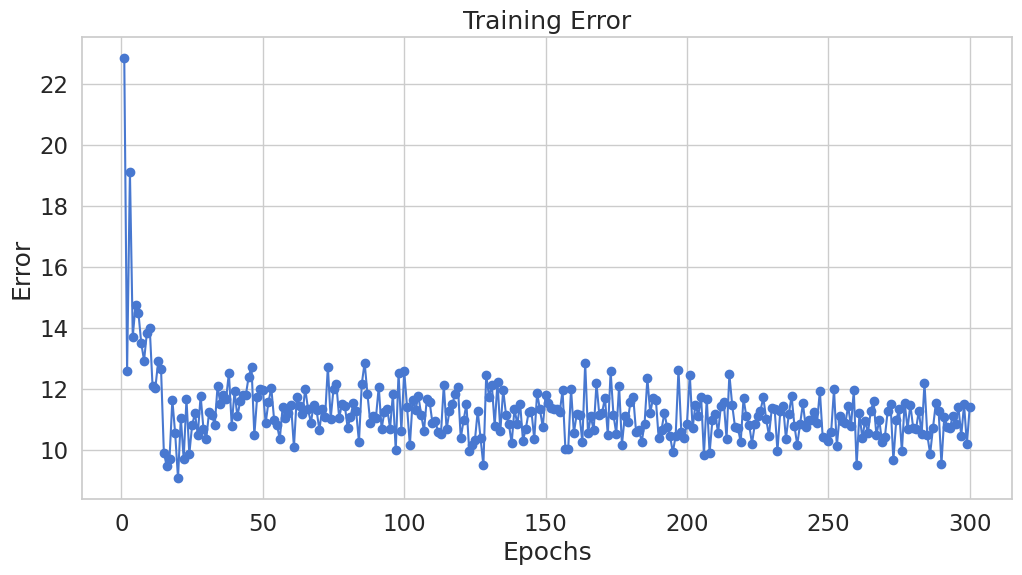

In [ ]:
#Entrenamiento
#300 epocas y 50 neuronas en la capa oculta (hidden layer)

nn = NNClassifier(n_classes= n_classes,
                  n_features= n_features,
                  n_hidden_units= 50,
                  l2=0.0,
                  l1=0.0,
                  epochs=300,
                  learning_rate=0.1,
                  n_batches=25,
                  random_seed=RANDOM_SEED)
nn.fit(X_train, y_train)

#Evaluación
def plot_error(nn):
    plt.plot(range(1, len(nn.error_) + 1), nn.error_, marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.title('Training Error')
    plt.show()

plot_error(nn)

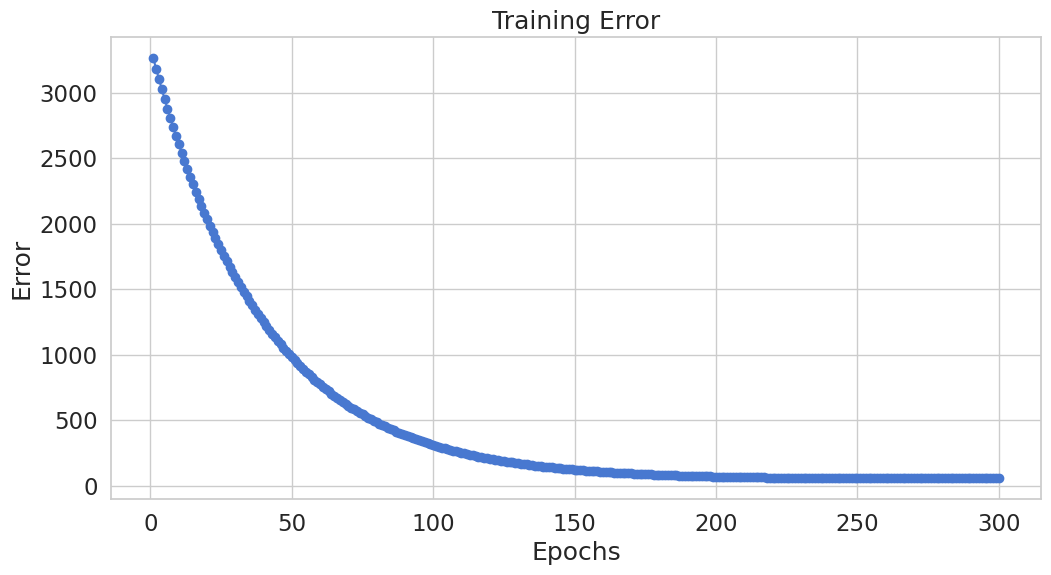

In [ ]:
from sklearn.preprocessing import scale, normalize

# Reshape X_train to a 2D array before scaling
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_train_std = scale(X_train_reshaped.astype(np.float64))

# Reshape X_test to a 2D array before scaling
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)
X_test_std = scale(X_test_reshaped.astype(np.float64))

nn = NNClassifier(n_classes=n_classes,
                  n_features=n_features,
                  n_hidden_units=50,
                  l2=0.5,
                  l1=0.0,
                  epochs=300,
                  learning_rate=0.001,
                  n_batches=25,
                  random_seed=RANDOM_SEED)
nn.fit(X_train_std, y_train);
plot_error(nn)

In [ ]:
print('Train Accuracy: %.2f%%' % (nn.score(X_train_std, y_train) * 100))
print('Test Accuracy: %.2f%%' % (nn.score(X_test_std, y_test) * 100))

Train Accuracy: 87.20%
Test Accuracy: 81.85%


In [ ]:
nn.predict_proba(X_test[1:2])

<ipython-input-2-258ecf1be5db>:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


array([[0.08907885, 0.08608122, 0.10547408, 0.08968168, 0.08503049,
        0.08629624, 0.08512405, 0.08671005, 0.20072817, 0.08579518]])

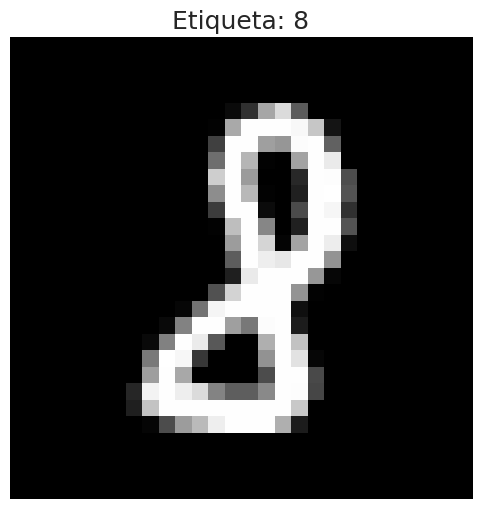

In [ ]:
plot_digit(X_test, y_test, idx=1)

<ipython-input-2-258ecf1be5db>:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


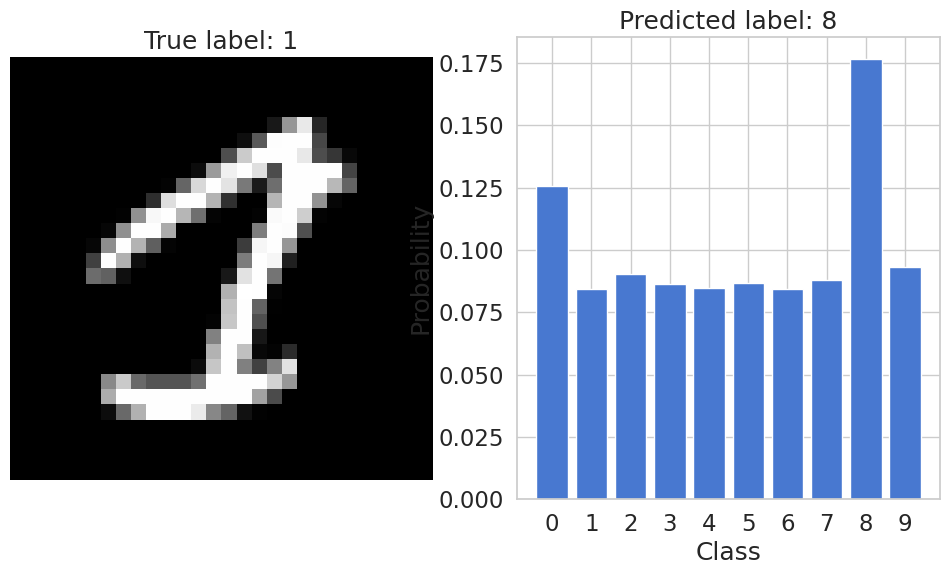

In [ ]:
def plot_digit_dist(X_test, y_test, idx, model):
    # Get the image and the true label
    image = X_test[idx]
    true_label = y_test[idx]

    # Get the model's prediction probabilities
    probas = model.predict_proba(image.reshape(1, -1))

    # Get the predicted label
    predicted_label = np.argmax(probas)

    # Plot the image
    plt.subplot(1, 2, 1)
    plt.imshow(image.reshape(28, 28), cmap='gray')
    plt.title(f'True label: {true_label}')
    plt.axis('off')

    # Plot the distribution of probabilities
    plt.subplot(1, 2, 2)
    plt.bar(range(len(probas[0])), probas[0])
    plt.xticks(range(len(probas[0])))
    plt.title(f'Predicted label: {predicted_label}')
    plt.xlabel('Class')
    plt.ylabel('Probability')

    plt.show()

# Example usage:
plot_digit_dist(X_test, y_test, idx=40, model=nn)